In [1]:
g_a = []
vgg = []
d_a = []
d_p = []

In [2]:
file_path = 'loss/loss_log.txt'
with open(file_path) as file:
    for line in file:
        if line[:2] == '(e':
            line_splitted = line.split(' ')
            # print(line_splitted)
            g_a.append(float(line_splitted[line_splitted.index('G_A:') + 1]))
            vgg.append(float(line_splitted[line_splitted.index('vgg:') + 1]))
            d_a.append(float(line_splitted[line_splitted.index('D_A:') + 1]))
            d_p.append(float(line_splitted[line_splitted.index('D_P:') + 1]))
            # epoch.append(float(line_splitted[line_splitted.index('(epoch:') + 1]))

In [3]:
import numpy as np
def running_window(l):
    new_list = []
    n=20
    ret = np.cumsum(l, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
    
g_a_s = running_window(g_a)
vgg_s = running_window(vgg)
d_a_s = running_window(d_a)
d_p_s = running_window(d_p)

In [4]:
import matplotlib.pyplot as plt

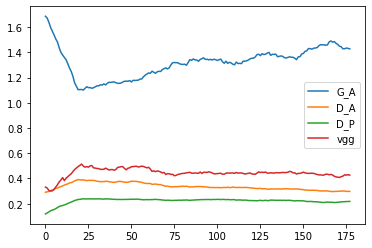

In [5]:
fig, ax = plt.subplots()

# ax.plot(g_a)
ax.plot(g_a_s)
ax.plot(d_a_s)
ax.plot(d_p_s)
ax.plot(vgg_s)

ax.legend(['G_A', 'D_A', 'D_P', 'vgg'])

In [27]:
print('Generator start loss: ', round(g_a_s[0], 2))
print('Generator end loss: ', round(g_a_s[-1],2))
print('Generator max loss: ', round(g_a_s.max(), 2))
print('Generator min loss: ', round(g_a_s.min(), 2))

Generator start loss:  1.69
Generator end loss:  1.43
Generator max loss:  1.69
Generator min loss:  1.1


In [24]:
print('Global D start loss: ', round(d_a_s[0], 2))
print('Global D end loss: ', round(d_a_s[-1], 2))
print('Global D max loss: ', round(d_a_s.max(), 2))

Global D start loss:  0.29
Global D end loss:  0.3
Global D max loss:  0.39


In [25]:
print('Local D start loss: ', round(d_p_s[0], 2))
print('Local D end loss: ', round(d_p_s[-1], 2))
print('Local D max loss: ', round(d_p_s.max(), 2))

Local D start loss:  0.12
Local D end loss:  0.22
Local D max loss:  0.24


In [26]:
print('VGG start loss: ', round(vgg_s[0], 2))
print('VGG D end loss: ', round(vgg_s[-1],2))
print('VGG max loss: ', round(vgg_s.max(), 2))

VGG start loss:  0.33
VGG D end loss:  0.43
VGG max loss:  0.51
